# Chapter 14. Introduction to Network Data
## Notebook for Python

### 14.1 Representing and visualizing networks

In [155]:
import networkx as nx
import matplotlib.pyplot as plt
edges = [("Hillary Clinton", "Donald Trump"), ("Bernie Sanders","Hillary Clinton"), ("Hillary Clinton", 
        "Barack Obama"), ("John McCain", "Donald Trump")]
g1 = nx.Graph()
g1.add_edges_from(edges)
print("Imaginary Facebook network of 5 American politicians")
print("Nodes:", g1.number_of_nodes(), "Edges: ", g1.number_of_edges())
print(g1.edges)

Imaginary Facebook network of 5 American politicians
Nodes: 5 Edges:  4
[('Hillary Clinton', 'Donald Trump'), ('Hillary Clinton', 'Bernie Sanders'), ('Hillary Clinton', 'Barack Obama'), ('Donald Trump', 'John McCain')]


/Users/carlosarcila/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


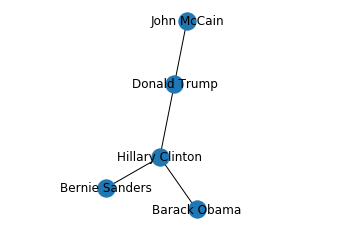

In [156]:
%matplotlib inline
nx.draw_networkx(g1)   

pos=nx.shell_layout(g1)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

In [157]:
edges = [("Hillary Clinton", "Donald Trump"), ("Bernie Sanders","Hillary Clinton"), ("Hillary Clinton", 
        "Barack Obama"), ("John McCain", "Donald Trump"), ("Barack Obama", "Hillary Clinton"),
        ("Hillary Clinton", "Bernie Sanders")]
g2 = nx.DiGraph()
g2.add_edges_from(edges)
print("Imaginary Twitter network of 5 American politicians")
print("Nodes:", g2.number_of_nodes(), "Edges: ", g2.number_of_edges())
print(g2.edges)

Imaginary Twitter network of 5 American politicians
Nodes: 5 Edges:  6
[('Hillary Clinton', 'Donald Trump'), ('Hillary Clinton', 'Barack Obama'), ('Hillary Clinton', 'Bernie Sanders'), ('Bernie Sanders', 'Hillary Clinton'), ('Barack Obama', 'Hillary Clinton'), ('John McCain', 'Donald Trump')]


/Users/carlosarcila/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


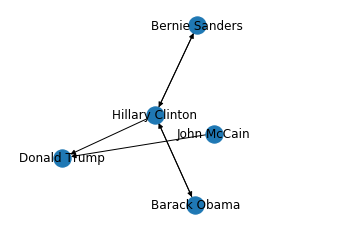

In [158]:
nx.draw_networkx(g2)

pos=nx.shell_layout(g2)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

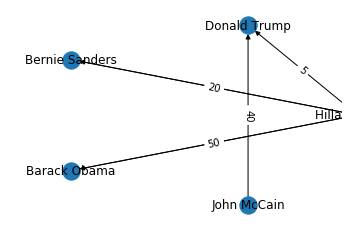

In [159]:
edges_w = [("Hillary Clinton", "Donald Trump", 5), ("Bernie Sanders","Hillary Clinton", 20), ("Hillary Clinton", 
        "Barack Obama", 30), ("John McCain", "Donald Trump", 40), ("Barack Obama", "Hillary Clinton", 50),
        ("Hillary Clinton", "Bernie Sanders", 10)]
g2 = nx.DiGraph()
g2.add_weighted_edges_from(edges_w)

edge_labels=dict([((u,v,),d['weight']) for u,v,d in g2.edges(data=True)])

nx.draw_networkx_edge_labels(g2,pos,edge_labels=edge_labels)
nx.draw_networkx(g2, pos)

pos=nx.spring_layout(g2)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

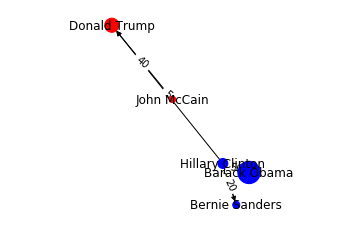

In [160]:
attrs = {'Hillary Clinton': {'followers': 100000, 'party': 'Democrat'}, 
         'Donald Trump': {'followers': 200000, 'party': 'Republican'}, 
         'Bernie Sanders': {'followers': 50000, 'party': 'Democrat'}, 
         'Barack Obama': {'followers': 500000, 'party': 'Democrat'}, 
         'John McCain': {'followers': 40000, 'party': 'Republican'} }
nx.set_node_attributes(g2, attrs)
size = nx.get_node_attributes(g2, 'followers')
size = list(size.values())

colors= nx.get_node_attributes(g2, 'party')
colors = list(colors.values())
colors = [w.replace('Democrat', 'blue') for w in colors]
colors = [w.replace('Republican', 'red') for w in colors]
colors
#list(g2.nodes(data=True))

nx.draw_networkx_edge_labels(g2,pos,edge_labels=edge_labels)
nx.draw_networkx(g2, pos, node_size=[x * 0.001 for x in size], node_color=colors)

pos=nx.spring_layout(g2)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

In [161]:
g3 = g2.subgraph(['Hillary Clinton', 'Bernie Sanders', 'Barack Obama'])
print("Democrats:")
print("Nodes:", g3.number_of_nodes(), "Edges: ", g3.number_of_edges())
print(g3.edges)

g4 = g2.subgraph(['Donald Trump', 'John McCain'])
print("Republicans:")
print("Nodes:", g4.number_of_nodes(), "Edges: ", g4.number_of_edges())
print(g4.edges)

Democrats:
Nodes: 3 Edges:  4
[('Hillary Clinton', 'Barack Obama'), ('Hillary Clinton', 'Bernie Sanders'), ('Bernie Sanders', 'Hillary Clinton'), ('Barack Obama', 'Hillary Clinton')]
Republicans:
Nodes: 2 Edges:  1
[('John McCain', 'Donald Trump')]


In [220]:
import requests
file = requests.get('http://cssbook.net/d/spanish_politicians_twitter_edges.csv')
text_file = open("spanish_politicians_twitter_edges.csv", "w")
text_file.write(file.text) #Save to local
g5 = nx.read_adjlist("spanish_politicians_twitter_edges.csv", create_using=nx.DiGraph, delimiter=",")
!rm spanish_politicians_twitter_edges.csv #Remove from local
print("Nodes:", g5.number_of_nodes(), "Edges: ", g5.number_of_edges())

Nodes: 19515 Edges:  21498


### 14.2 Social network analysis